In [1]:
!pip3 install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [4]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

model = gensim.downloader.load("glove-wiki-gigaword-100")

lamb = model['lamb']

print(model.most_similar('lamb'))

print(model.similarity('lamb', 'dove'))


[('roast', 0.7397937178611755), ('chicken', 0.7248150706291199), ('mutton', 0.6963831186294556), ('pork', 0.6794513463973999), ('meat', 0.6770470142364502), ('veal', 0.675204336643219), ('roasted', 0.6714096069335938), ('bacon', 0.6668247580528259), ('fried', 0.6506767868995667), ('cook', 0.6420342922210693)]
0.34262258


In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [6]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [7]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

ethnicity=model["hispanic"]-model["latin"]

print(model.most_similar(ethnicity))
print(model.most_similar(-ethnicity))
model.most_similar(model["food"]+ethnicity)

[('hispanic', 0.5209025740623474), ('unbelted', 0.5074544548988342), ('suburbanites', 0.49695321917533875), ('latino', 0.4725956916809082), ('unenrolled', 0.47206342220306396), ('47,500', 0.45485803484916687), ('caseworkers', 0.4497848451137543), ('upperclass', 0.4427977204322815), ('hispanics', 0.4403437674045563), ('salleh', 0.43988174200057983)]
[('latin', 0.4888252317905426), ('translations', 0.4291837215423584), ('translated', 0.4168199896812439), ('misérables', 0.4128084182739258), ('vulgate', 0.39819562435150146), ('chekhov', 0.39538344740867615), ('persia', 0.3947029411792755), ('hexameter', 0.3944953978061676), ('verse', 0.39208680391311646), ('byzantium', 0.3881908059120178)]


[('food', 0.7015246748924255),
 ('nutrition', 0.5523122549057007),
 ('hispanic', 0.5494300723075867),
 ('foods', 0.5402264595031738),
 ('livestock', 0.5349736213684082),
 ('feed', 0.5312210321426392),
 ('health', 0.5289674997329712),
 ('meals', 0.5266644358634949),
 ('care', 0.5077842473983765),
 ('children', 0.5058695077896118)]

Part 2: Visualization and Embeddings in Space

In [8]:
from sklearn.decomposition import PCA

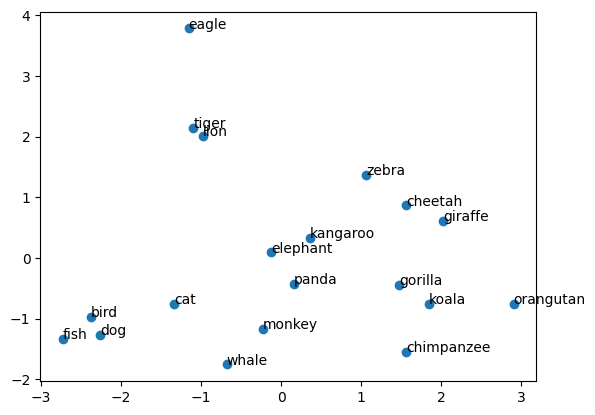

In [9]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

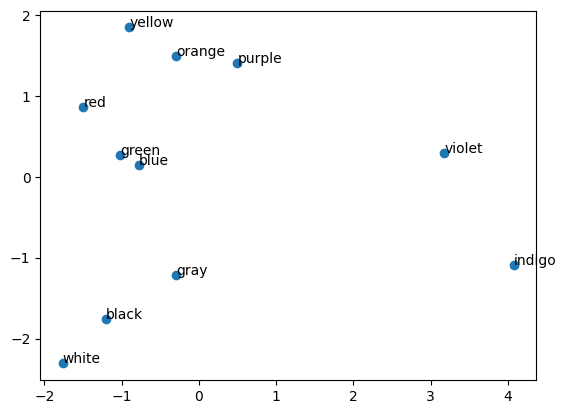

In [10]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=["blue", "yellow", "black", "purple", "green", "red", "indigo", "violet", "orange", "white", "gray",]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [11]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [12]:
#read in uiuc csv

import pandas as pd 

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

print(data)



      Unnamed: 0                 date  post_votes  \
0              0  2024-09-04 14:43:40           2   
1              1  2024-09-04 14:43:40           2   
2              2  2024-09-04 12:52:08           3   
3              3  2024-09-04 12:52:08           3   
4              4  2024-09-04 12:52:08           3   
...          ...                  ...         ...   
2704        2704  2024-08-24 21:56:01           1   
7759        7759  2024-07-09 23:24:42           3   
6031        6031  2024-07-22 17:33:42          33   
891          891  2024-08-30 16:29:52          37   
6786        6786  2024-07-15 02:35:35           4   

                                                   text                  user  \
0     Have the same professor! And in lecture he did...              zhen3441   
1     Do you find it helpful to still go to the lect...               Kai2747   
2     Have you tried emailing University Housing to ...         TurboBKTastic   
3     Purchasing Illini Cash should get

In [13]:
#using the code from project 1, clean the text and create a bag of words representation of the text

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

texts=[]
for text in data["text"]:
    clean(text)
    text = clean(text)
    texts.append(text)

data["text"]= texts

In [14]:
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,have the same professor and in lecture he did ...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,have you tried emailing university housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,purchasing illini cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,just did thanks for the suggestion it hadnt oc...,Sector-Both,1,1
...,...,...,...,...,...,...,...
2704,2704,2024-08-24 21:56:01,1,idk if i can switch to anything good at this p...,ChangeAvailable,1,0
7759,7759,2024-07-09 23:24:42,3,i think that its a very useful course if you w...,Substantial_Luck_273,2,0
6031,6031,2024-07-22 17:33:42,33,removed,NaN,-11,0
891,891,2024-08-30 16:29:52,37,give them ur nuts,TwoBits0303,4,0


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')

X = vectorizer.fit_transform(data["text"])


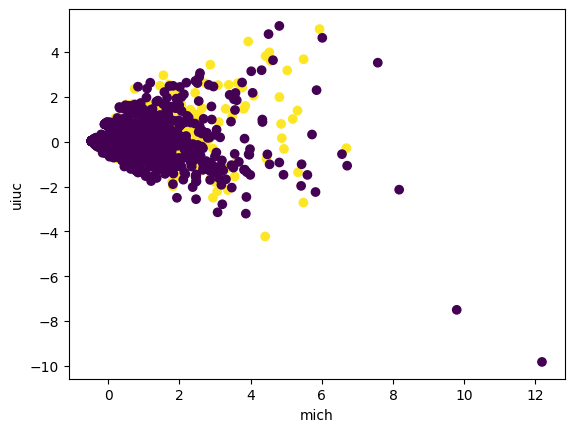

In [16]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set


from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

#let's look at two words and plot the dimensions
import matplotlib.pyplot as plt

plt.xlabel("mich")

plt.ylabel("uiuc")

#color by author
colors = {'mich':'red', 'uiuc':'blue'}

plt.scatter(principalComponents[:,0],principalComponents[:,1],c=data['label'])

import matplotlib.patches as mpatches


#color by the "label" column to see if the two subreddits are separable in the embedding space

plt.xlabel("mich")
plt.ylabel("uiuc")

plt.show()

# is there a clear separation between the two columns? 

# There is not a clear seperation between the two columns, however it is cleae that there are outliers. 

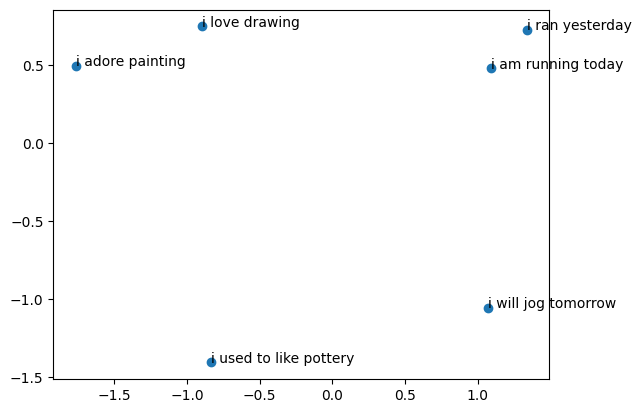

In [17]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

Part 4: HuggingFace and BERT

In [3]:
!pip install transformers

In [2]:
!pip install torch

In [3]:
!pip install torchvision

In [2]:
!pip install 'transformers[torch]'

In [3]:
from transformers import AutoTokenizer, AutoModel

ModuleNotFoundError: No module named 'transformers'

In [7]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

2024-11-11 17:12:33.505252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [1]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


ModuleNotFoundError: No module named 'transformers'

In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?